In [34]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import pandas as pd

In [138]:
descriptions = pd.read_csv('tiny-imagenet-200/words.txt', sep='\t', names=['id', 'label'])
descriptions

,id,label
0,n00001740,entity
1,n00001930,physical entity
2,n00002137,"abstraction, abstract entity"
3,n00002452,thing
4,n00002684,"object, physical object"
...,...,...
82110,n15299225,study hall
82111,n15299367,"Transfiguration, Transfiguration Day, August 6"
82112,n15299585,usance
82113,n15299783,window


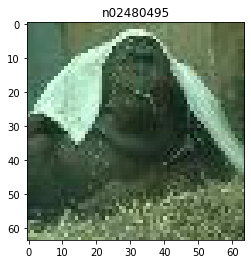

In [141]:
def get_rand_train_img():
    #returns numpy array and label string for a random image from the
    #training data folder
    ids = listdir('tiny-imagenet-200/train/')
    rand_idx = np.random.randint(len(ids))
    rand_id = ids[rand_idx]
    imgs = listdir('tiny-imagenet-200/train/' + rand_id + '/images/')
    rand_idx = np.random.randint(len(imgs))
    rand_img = 'tiny-imagenet-200/train/' + str(rand_id) + \
    '/images/' + str(rand_id) + '_' + str(rand_idx) + '.JPEG'
    img = Image.open(rand_img)
    img = np.array(img)
    
    label = rand_id
    #label = labels[labels['id'] == rand_id].iloc[0][1]
    
    return img, label

img, label = get_rand_train_img()
plt.imshow(img)
plt.title(label)
plt.show()

In [98]:
def flip_x(img):
    #returns copy of img that is flipped horizontally
    flipped = np.fliplr(img)
    return flipped

def flip_y(img):
    #returns copy of img that is flipped vertically
    flipped = np.fliplr(img)
    return flipped

In [83]:
def down_translation(img, y):
    #returns copy of img that is translated downwards by y pixels and 
    #fills in gaps with edge pixels in that row from original image
    translated = np.zeros(img.shape)
    for i in range(img.shape[0]):
        if (i >= y and i < img.shape[0] + y):
            translated[i, :, :] = img[i - y, :, :]
        elif (y > 0):
            translated[i, :, :] = img[0, :, :]
        else:
            translated[i, :, :] = img[img.shape[0] - 1, :, :]
    return translated.astype('uint8')

def right_translation(img, x):
    #returns copy of img that is translated right by x pixels and 
    #fills in gaps with edge pixelx in that row from original image
    translated = np.zeros(img.shape)
    for j in range(img.shape[1]):
        if (j >= x and j < img.shape[1] + x):
            translated[:, j, :] = img[:, j - x, :]
        elif (x > 0):
            translated[:, j, :] = img[:, 0, :]
        else:
            translated[:, j, :] = img[:, img.shape[1] - 1, :]
    return translated.astype('uint8')

In [86]:
def gaussian_noise(img, mean, std):
    #returns copy of img with gaussian noise with the provided
    #mean and std added to each pixel
    noise = np.random.normal(mean, std, size=img.shape)
    noisy = img + noise
    noisy = np.minimum(noisy, 255 * np.ones(noisy.shape))
    noisy = np.maximum(noisy, np.zeros(noisy.shape))
    return noisy.astype('uint8')

In [96]:
def rotation(img, theta):
    #returns copy of img, rotated anticlockwise by theta degrees
    img_ob = Image.fromarray(img, 'RGB')
    rotated = img_ob.rotate(theta)
    return rotated

In [143]:
def augmented_data(img):
    #returns list of:
    # - original image
    # - image flipped horizontally
    # - image flipped vertically
    # - 5 random horizontal translations of image by x in [-15, 15]
    # - 5 random vertical translations of image by y in [-15, 15]
    # - 5 noise-augmentions of image by random mean in [-100, 100]
    #   and random std in [0, 10]
    # - 7 random rotations of image by theta in [0, 180]
    augmented = [img]
    
    augmented.append(flip_x(img))
    
    augmented.append(flip_y(img))
    
    for x in np.random.randint(-15, 16, 5):
        augmented.append(right_translation(img, x))
        
    for y in np.random.randint(-15, 16, 5):
        augmented.append(down_translation(img, y))
        
    for i in range(5):
        mean = np.random.uniform(-100, 100)
        std = np.random.uniform(0, 10)
        augmented.append(gaussian_noise(img, mean, std))
        
    for theta in np.random.uniform(0, 180, 7):
        augmented.append(rotation(img, theta))
        
    return augmented

In [144]:
def plot_augmentations(img, label):
    #plot image + 24 augmentations, as detailed in the augmented_data function
    fig, ax = plt.subplots(5, 5, figsize=[50, 50])
    augmented = augmented_data(img)
    for i, x in enumerate(augmented):
        ax[i // 5][i % 5].imshow(x)
    fig.suptitle(label, fontsize=50, y=0.92)
    plt.show()

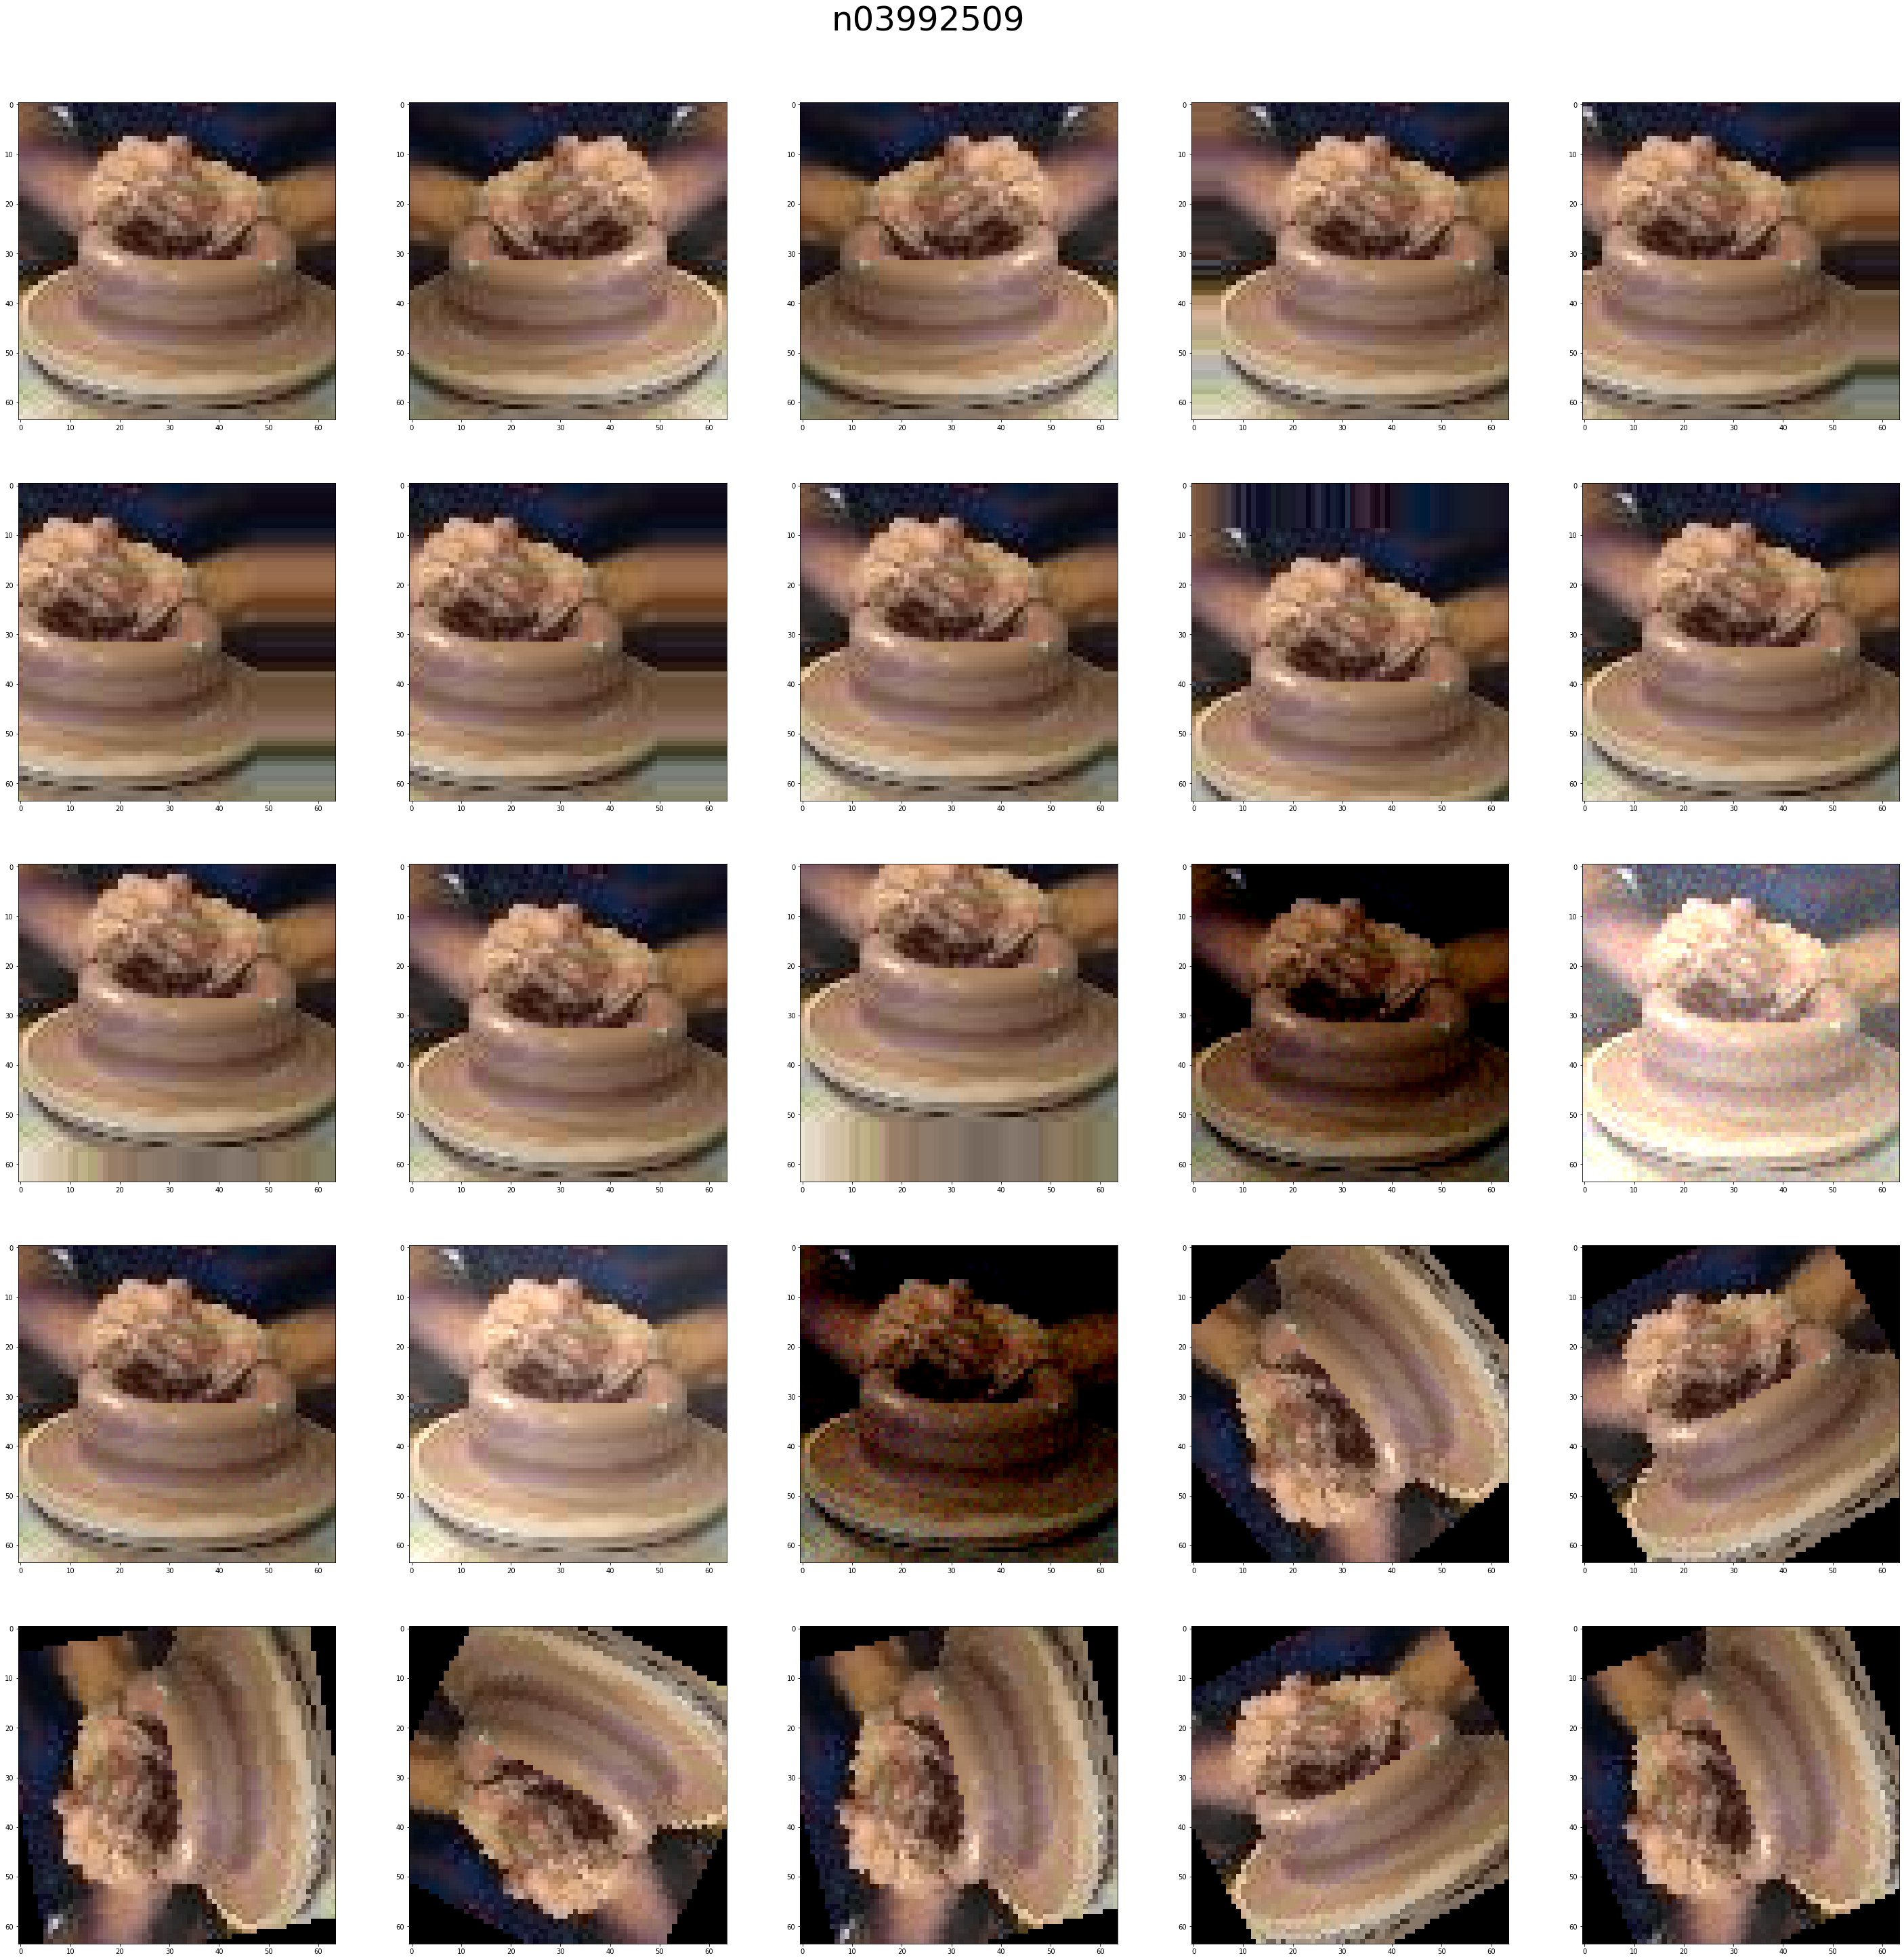

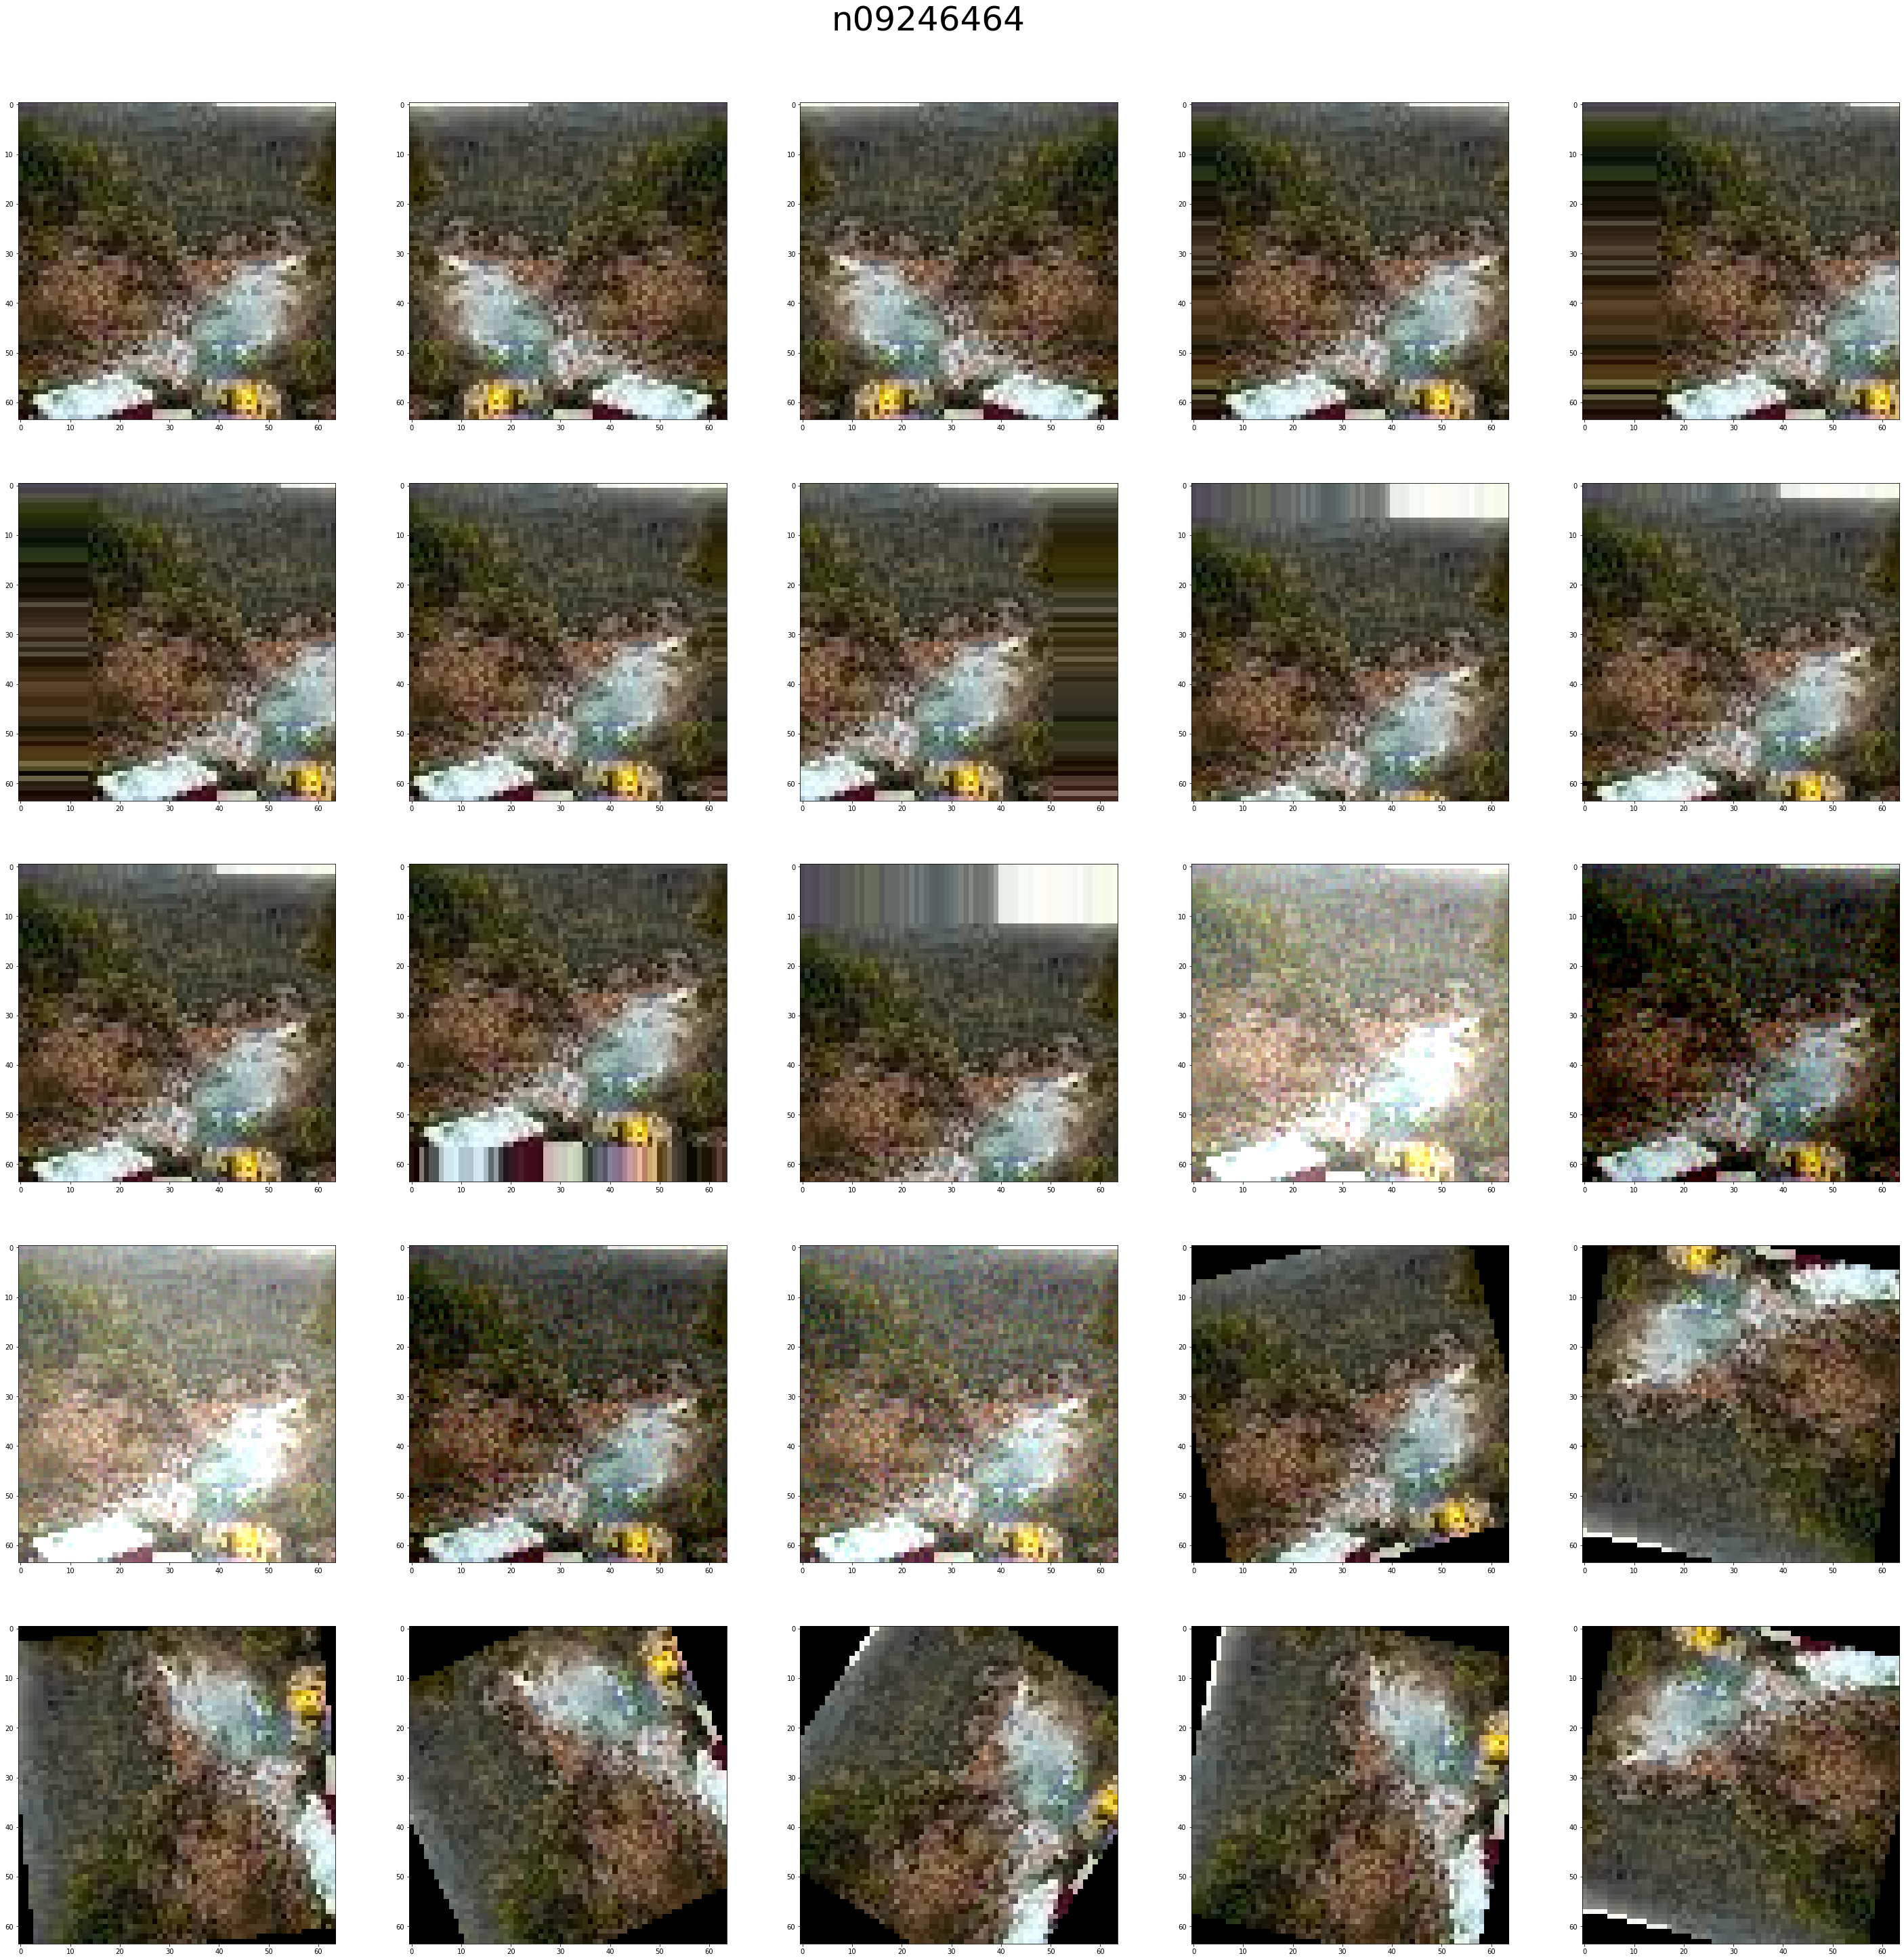

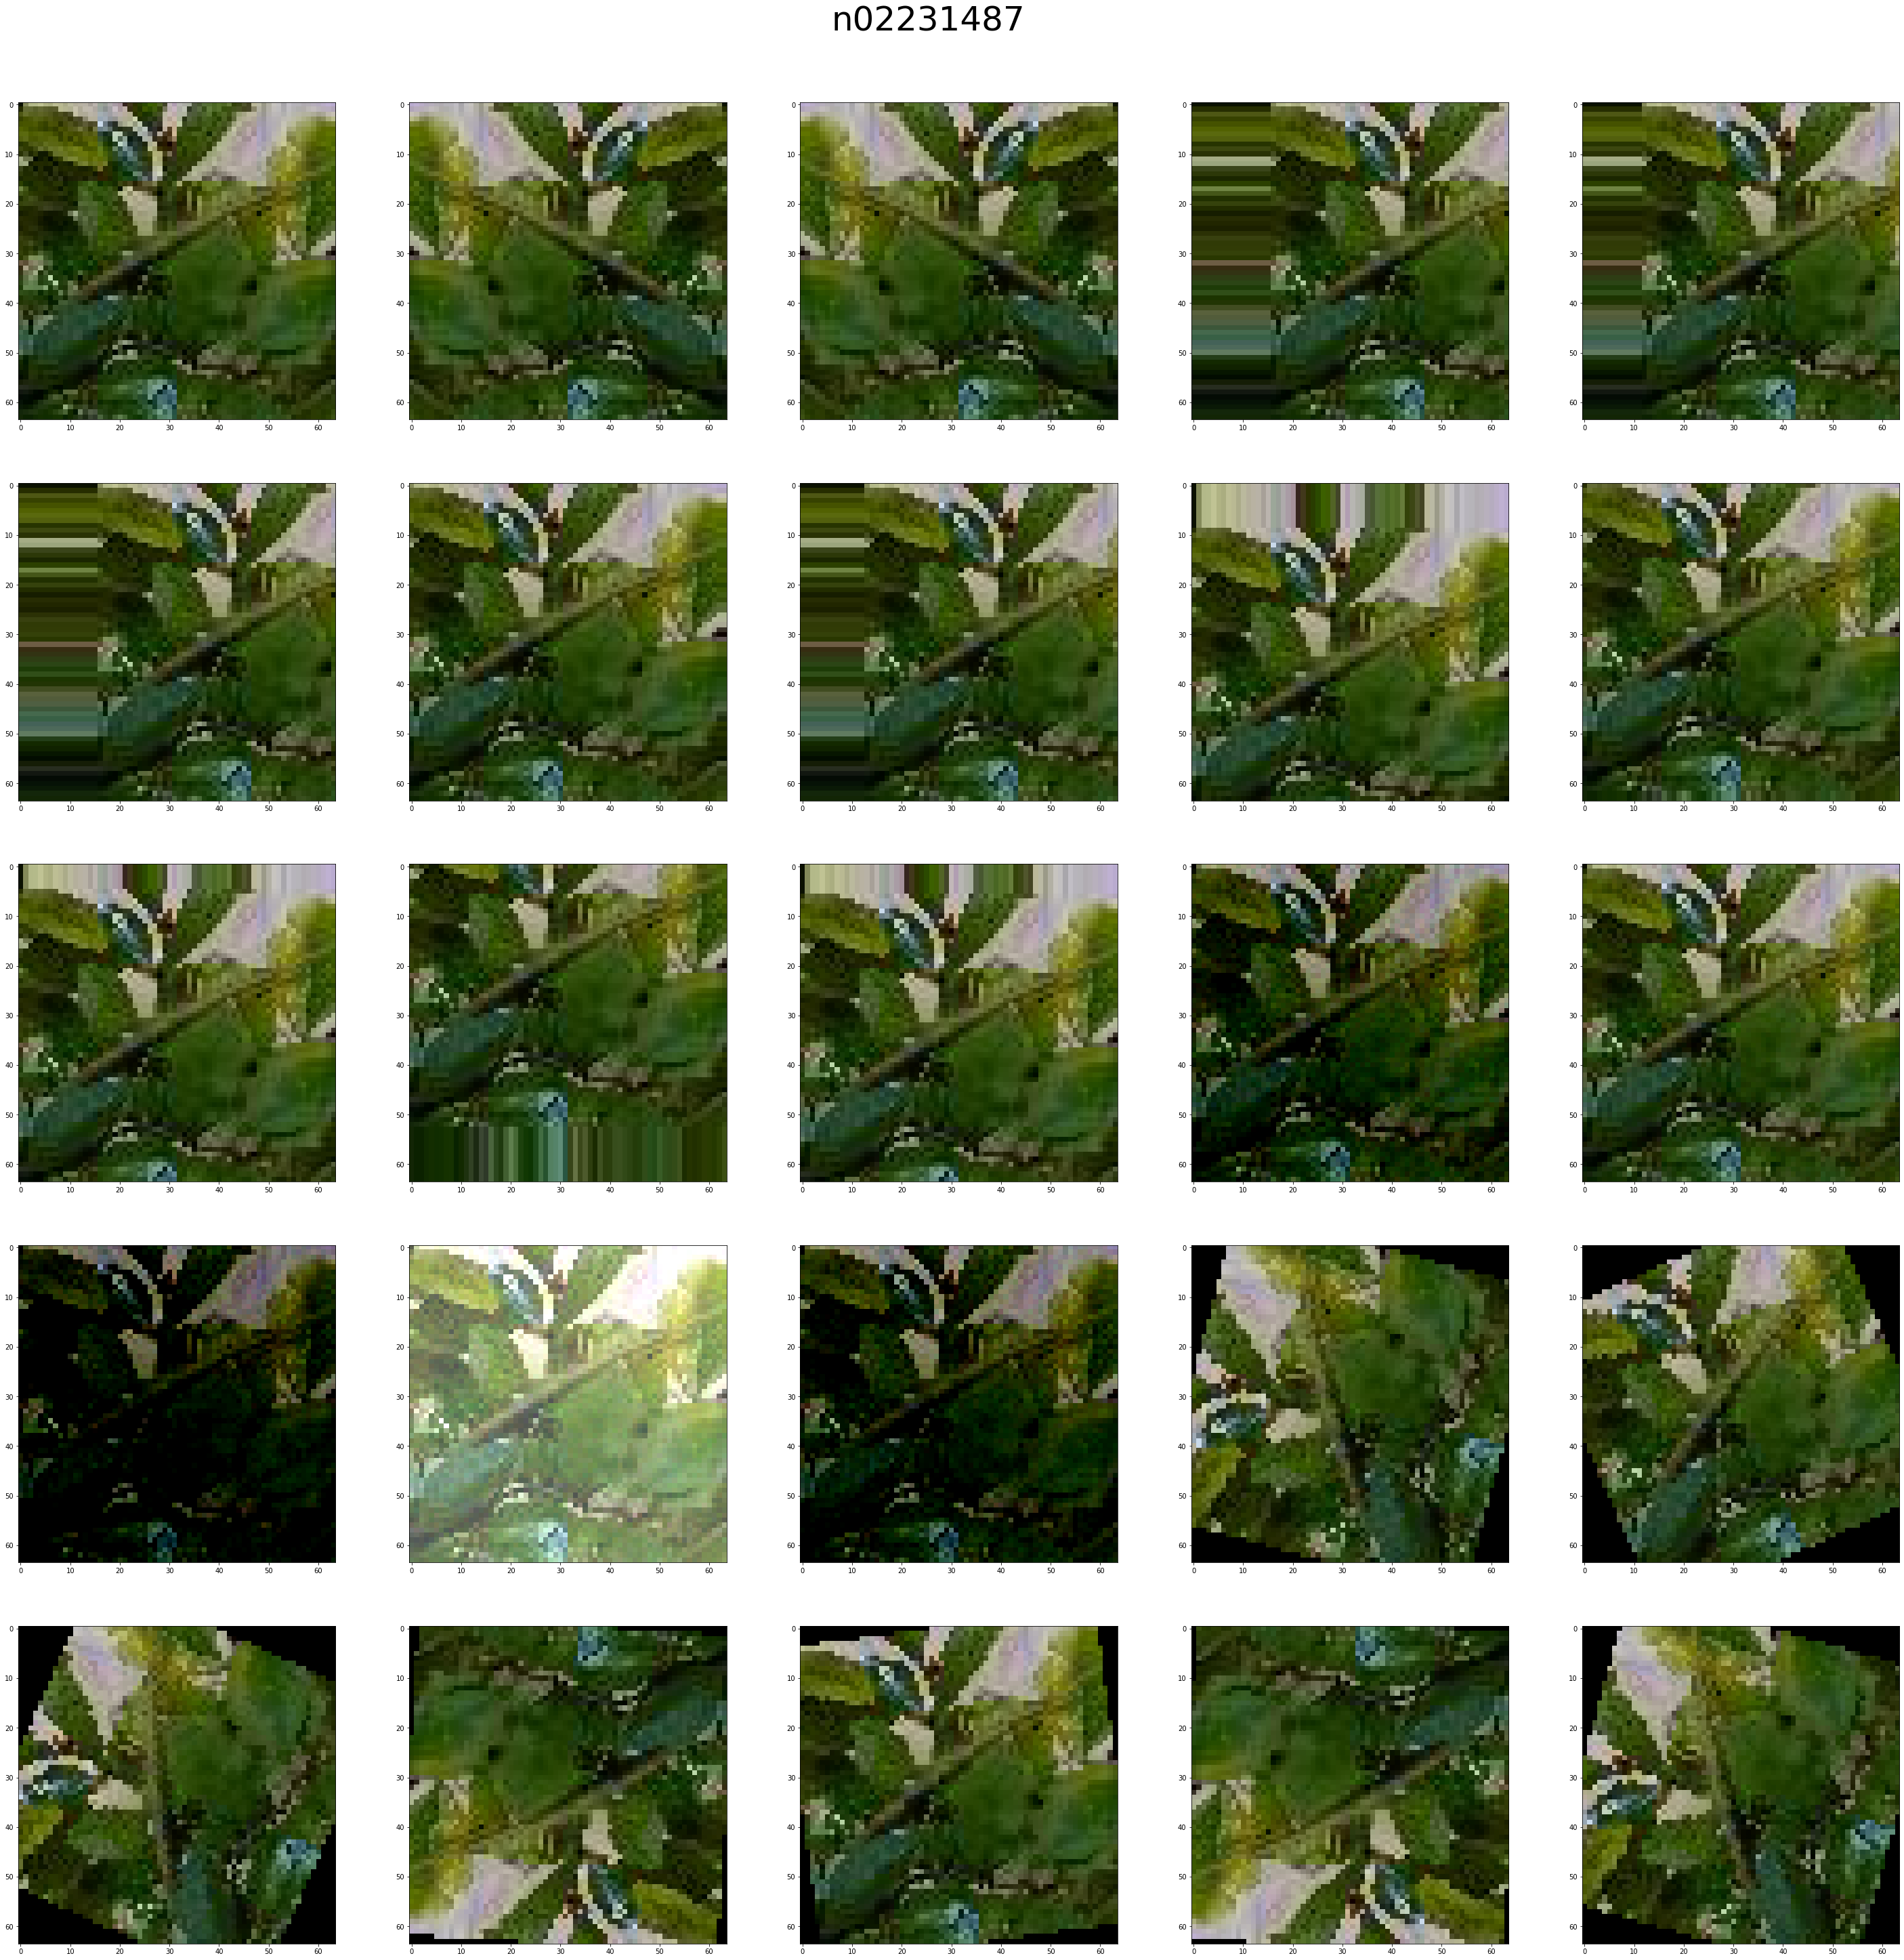

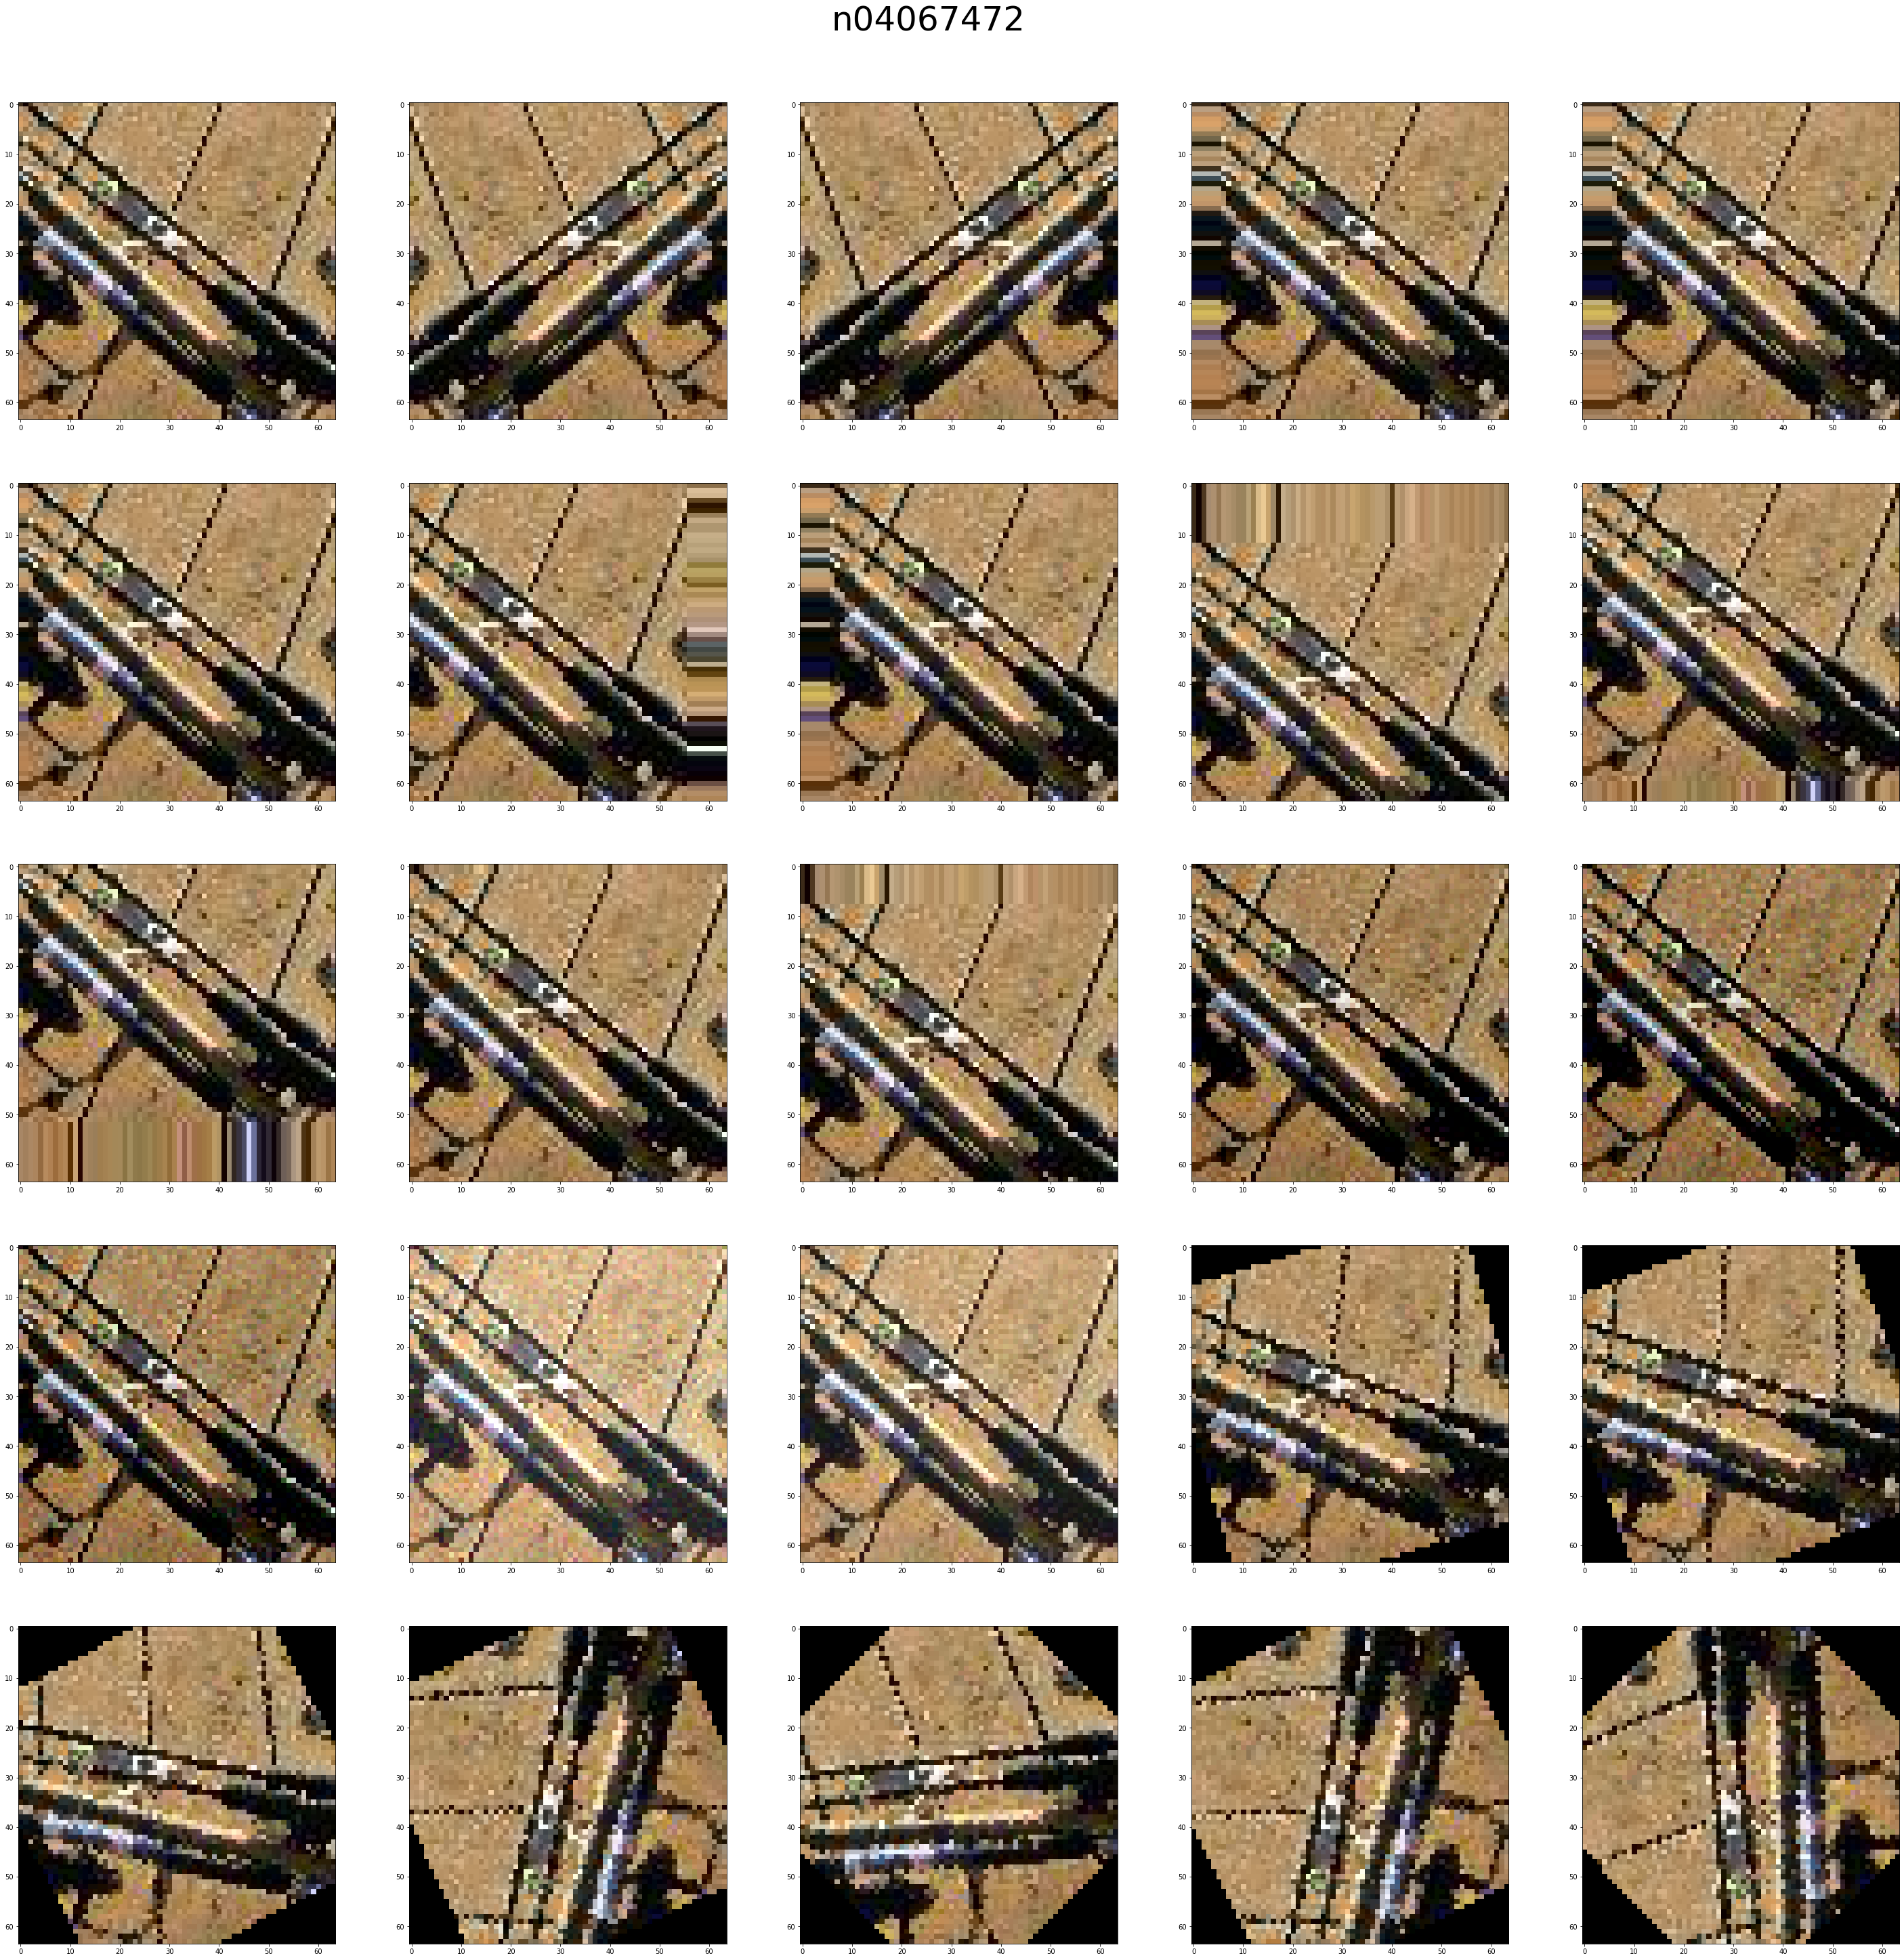

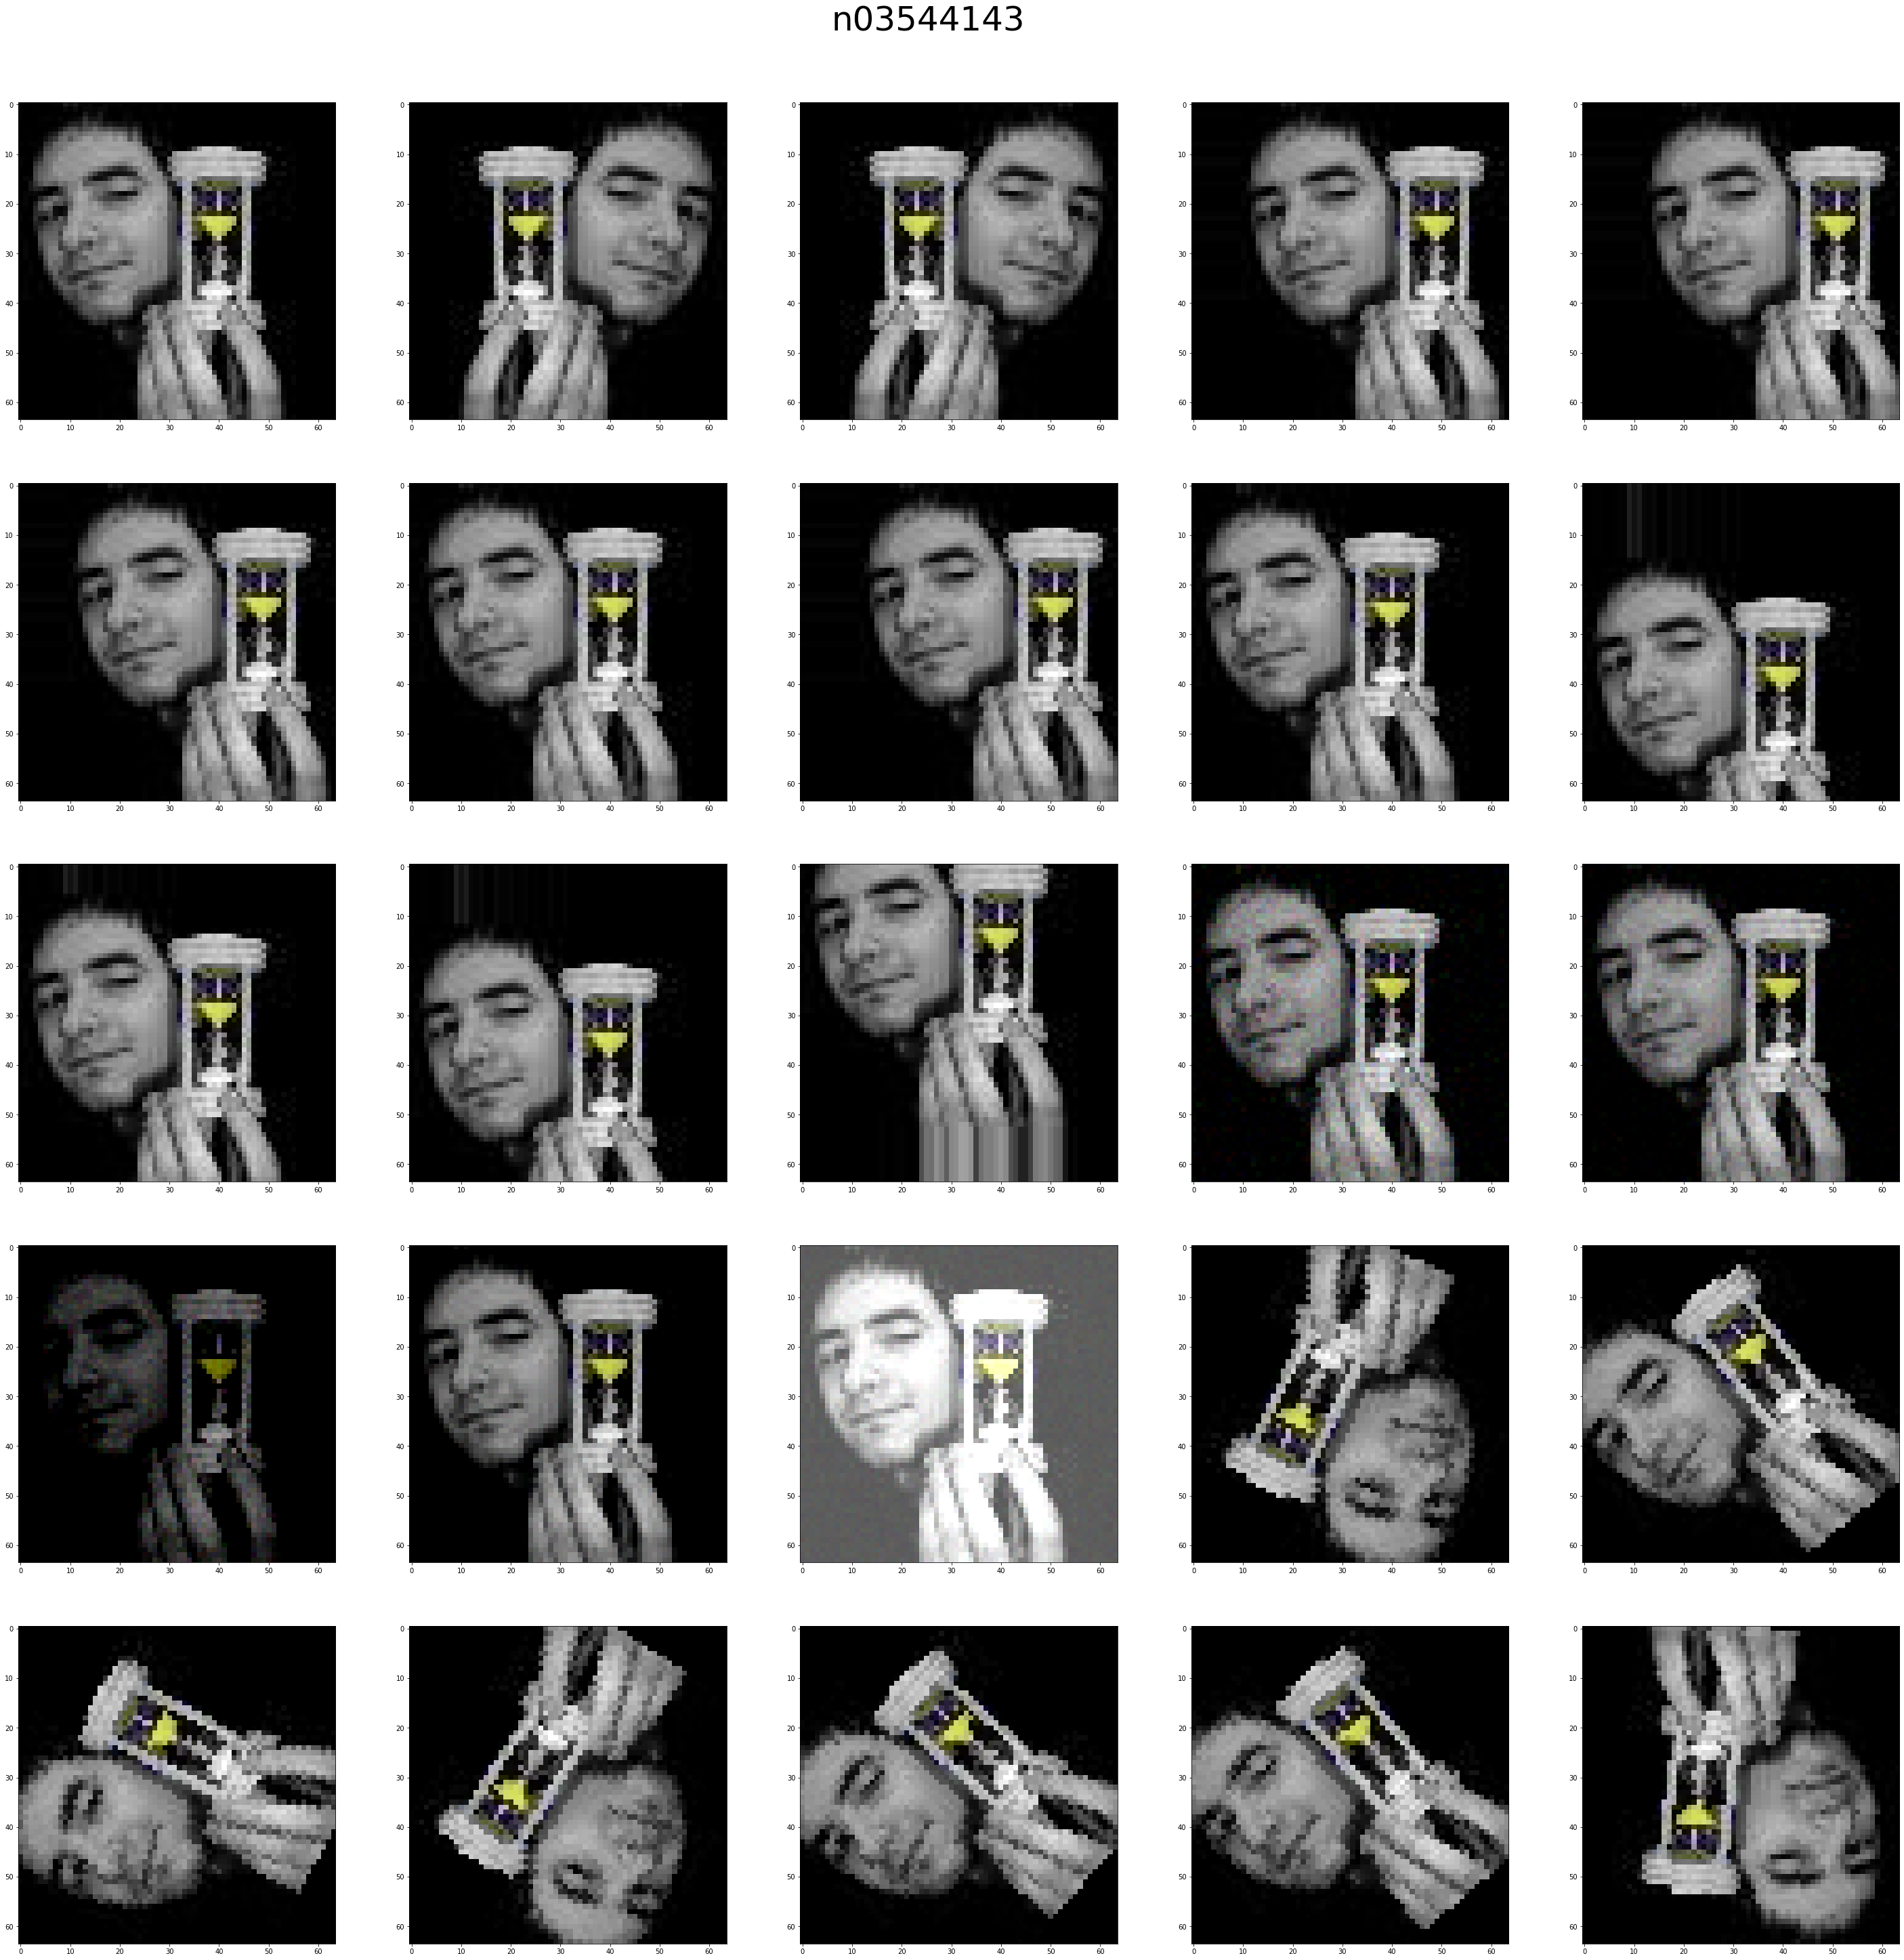

In [145]:
for i in range(5):
    img, label = get_rand_train_img()
    plot_augmentations(img, label)